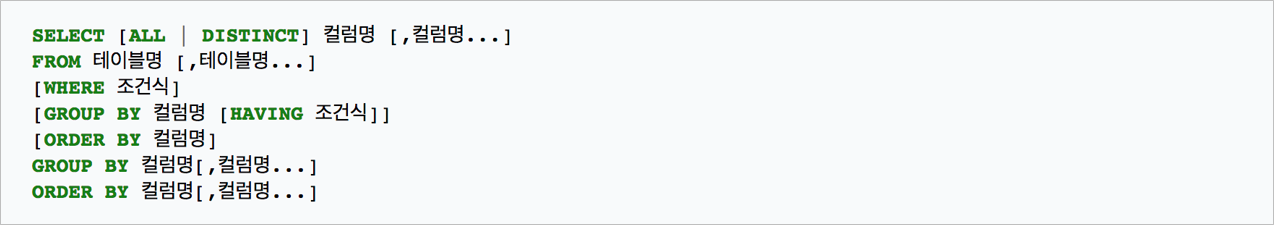

In [1]:
import sqlite3

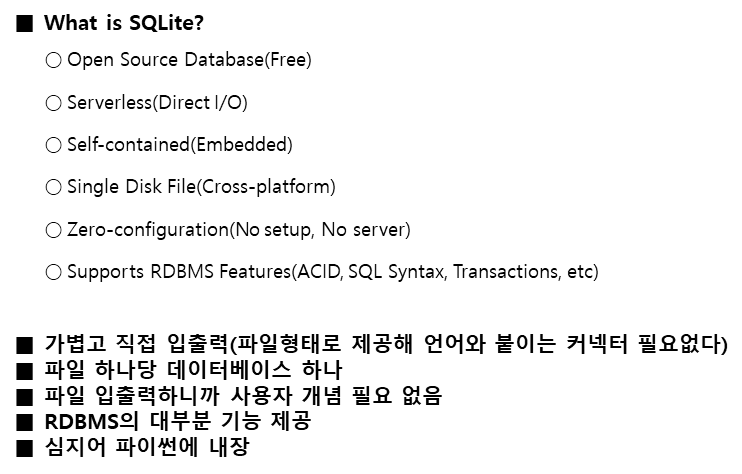

In [2]:
dir(sqlite3)

['Binary',
 'Cache',
 'Connection',
 'Cursor',
 'DataError',
 'DatabaseError',
 'Date',
 'DateFromTicks',
 'Error',
 'IntegrityError',
 'InterfaceError',
 'InternalError',
 'NotSupportedError',
 'OperationalError',
 'OptimizedUnicode',
 'PARSE_COLNAMES',
 'PARSE_DECLTYPES',
 'PrepareProtocol',
 'ProgrammingError',
 'Row',
 'SQLITE_ALTER_TABLE',
 'SQLITE_ANALYZE',
 'SQLITE_ATTACH',
 'SQLITE_CREATE_INDEX',
 'SQLITE_CREATE_TABLE',
 'SQLITE_CREATE_TEMP_INDEX',
 'SQLITE_CREATE_TEMP_TABLE',
 'SQLITE_CREATE_TEMP_TRIGGER',
 'SQLITE_CREATE_TEMP_VIEW',
 'SQLITE_CREATE_TRIGGER',
 'SQLITE_CREATE_VIEW',
 'SQLITE_DELETE',
 'SQLITE_DENY',
 'SQLITE_DETACH',
 'SQLITE_DROP_INDEX',
 'SQLITE_DROP_TABLE',
 'SQLITE_DROP_TEMP_INDEX',
 'SQLITE_DROP_TEMP_TABLE',
 'SQLITE_DROP_TEMP_TRIGGER',
 'SQLITE_DROP_TEMP_VIEW',
 'SQLITE_DROP_TRIGGER',
 'SQLITE_DROP_VIEW',
 'SQLITE_IGNORE',
 'SQLITE_INSERT',
 'SQLITE_OK',
 'SQLITE_PRAGMA',
 'SQLITE_READ',
 'SQLITE_REINDEX',
 'SQLITE_SELECT',
 'SQLITE_TRANSACTION',
 'SQLITE

In [3]:
sqlite3.version #Version of this module

'2.6.0'

In [4]:
sqlite3.sqlite_version #Version of run time SQLite 

'3.21.0'

In [3]:
conn = sqlite3.connect(':memory:')  #메모리로 작업

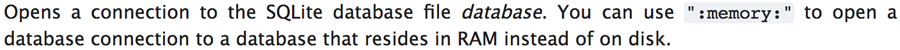

In [4]:
conn #여기까지 과정이 너무 simple함

In [5]:
cur = conn.cursor()

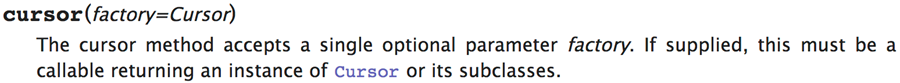

In [18]:
type(cur) #execute, executemany, executescript, fetch

sqlite3.Cursor

__Data type of SQLite__ -> 간편하지만 porting 시 문제
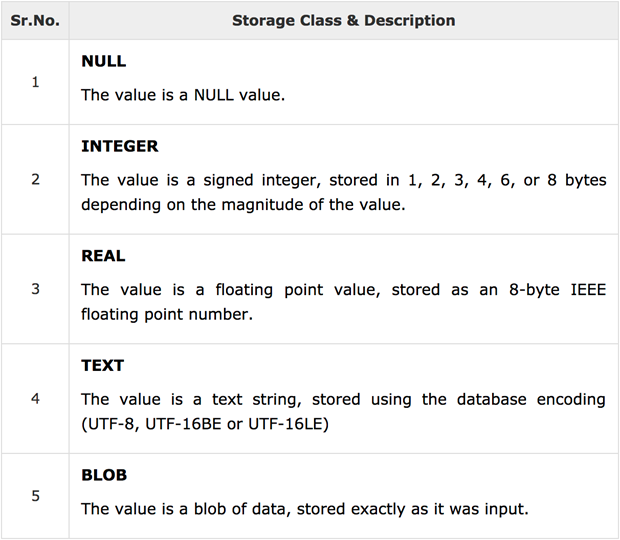

In [7]:
cur.execute('create table people (name_last, age)')

In [11]:
who = 'Yeltsin'
age = 72

In [13]:
#This is the qmark style:
cur.execute('insert into people values (?, ?)', (who, age))

In [14]:
#While this is the named style:
cur.execute('select * from people where name_last=:who and age=:age', {'who':who,'age':age})

In [16]:
print(cur.fetchone()) #데이터의 한 row를 pop

('Yeltsin', 72)


In [17]:
print(cur.fetchone())

None


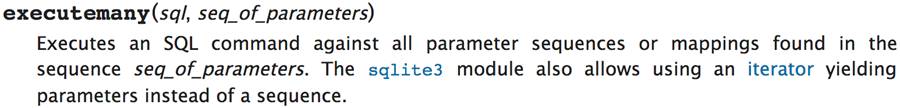

In [18]:
sql = 'insert into people values (?, ?)'
curData = [('A', 1), ('B', 2), ('C', 3)]

cur.executemany(sql, curData)

In [19]:
cur.execute('select * from people')
print(cur.fetchall())

[('A', 1), ('B', 2), ('C', 3), ('A', 1), ('B', 2), ('C', 3), ('A', 1), ('B', 2), ('C', 3), ('A', 1), ('B', 2), ('C', 3), ('A', 1), ('B', 2), ('C', 3)]


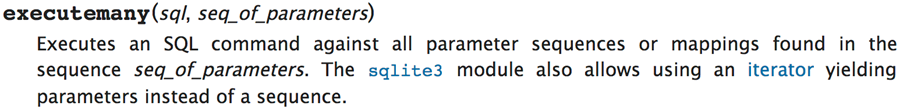

In [14]:
cur.executescript(
"""
    create table person(
        first_name text primary key,
        last_name text not null
    );
    
    insert into person values('name', 'kim');
""")
#select 는 쓰지말자

In [15]:
cur.execute('select * from person')
print(cur.fetchall())

[('name', 'kim')]


In [20]:
conn.close()

In [21]:
conn = sqlite3.connect("test.db") #db하나 통째로 파일로 제공

In [24]:
conn = sqlite3.connect('create.db')
print('Opened db successfully')
 
conn.execute('''
    create table company(
        ID INT PRIMARY KEY NOT NULL,
        NAME TEXT NOT NULL,
        AGE INT NOT NULL,
        ADDRESS CHAR(50),
        SALARY REAL);
''')
print('Table created successfully')

Opened db successfully
Table created successfully


In [25]:
conn.execute(
"""
INSERT INTO company VALUES (1, 'Paul', 32, 'California', 20000.00);""")


In [26]:
conn.execute('INSERT INTO company VALUES (:id, :name, :age, :address, :salary)',
            {'id':2, 'name':'Allen', 'age':25, 'address':'Texas', 'salary':15000.00})

In [27]:
data = [(3, 'Teddy', 23, 'Norway', 200000.00),
       (4,'Mark',25,'Rich-mond',65000.00)]
conn.executemany("insert into company values (?,?,?,?,?)",data)

In [28]:
conn.executescript("""
    insert into company values (5, 'Mark1',25,'Rich-mond', 65000.00);
    insert into company values (6, 'Mark2',25,'Rich-mond',65000.00);
""")

In [29]:
conn.commit()

In [36]:
temp = conn.execute('select * from company')

In [37]:
type(temp) #cursor 직접 받지않아도 conn이 자동적으로 cursor 가져옴

sqlite3.Cursor

In [38]:
for row in temp: #숨겨진 fetchone
    print(row)

(1, 'Paul', 32, 'California', 20000.0)
(2, 'Allen', 25, 'Texas', 15000.0)
(3, 'Teddy', 23, 'Norway', 200000.0)
(4, 'Mark', 25, 'Rich-mond', 65000.0)
(5, 'Mark1', 25, 'Rich-mond', 65000.0)
(6, 'Mark2', 25, 'Rich-mond', 65000.0)


In [39]:
cid = 1
conn.execute('update company set SALARY = 25000.00 where ID = :id',
             {'id':cid})
conn.commit()

In [42]:
conn.execute('delete from company where id=2')
conn.commit()